[graphviz 설치]
1. exe 파일 다운로드
1. 환경 변수 설정
1. 라이브러리 설치
1. PC 재부팅

# 결정 트리 모델 시각화

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## 학습 데이터, 테스트 데이터 셋 분리

In [2]:
iris_data = load_iris()

x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

In [8]:
x_test.shape

(30, 4)

In [9]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 하이퍼파라미터 조정 안 함 : default

In [3]:
# 1. 결정 트리 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 2. 학습
dt_clf.fit(x_train, y_train)

# 3. 예측
pred = dt_clf.predict(x_test)

# 4. 평가
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
f'테스트 데이터 세트 정확도 : {acc}'

'테스트 데이터 세트 정확도 : 0.9333333333333333'

In [4]:
# depth 확인
dt_clf.get_depth()

5

In [5]:
# leaf node 수 확인
dt_clf.get_n_leaves()

9

In [ ]:
# !pip install graphviz

In [6]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, 
                out_file='tree.dot', 
                class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, 
                filled=True,
               )

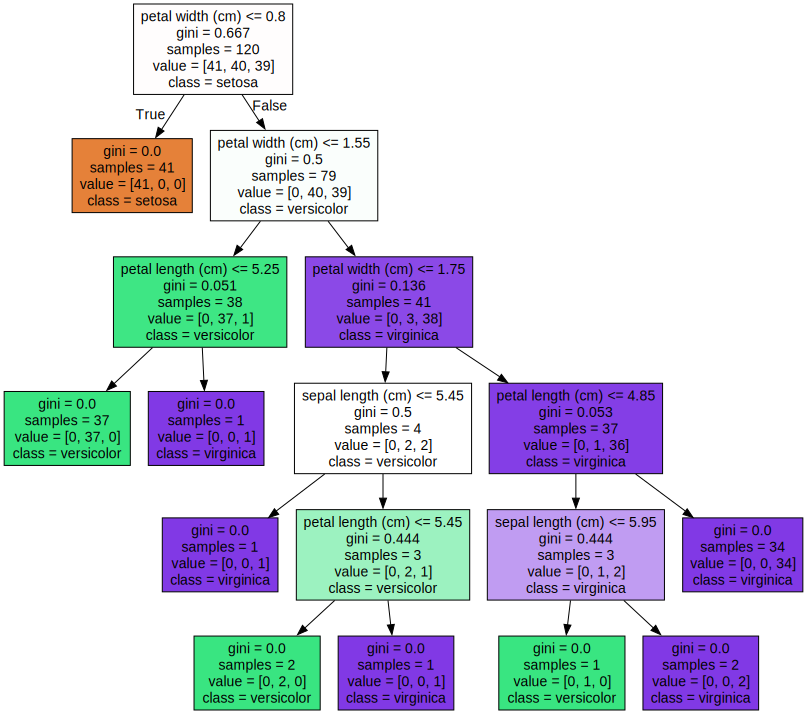

In [7]:
import graphviz

with open('tree.dot') as file:
    graph = file.read()
    
graphviz.Source(graph)

In [11]:
# 이미지 파일 저장
g_s = graphviz.Source(graph)
g_s.render(filename='iris 파라미터 조정하지 않음', format='png')

'iris 파라미터 조정하지 않음.png'

## 하이퍼파라미터 조정 : max-depth=3

In [13]:
# 1. 결정 트리 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11, max_depth=3)

# 2. 학습
dt_clf.fit(x_train, y_train)

# 3. 예측
pred = dt_clf.predict(x_test)

# 4. 평가
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
f'테스트 데이터 세트 정확도 : {acc: .4f}'

'테스트 데이터 세트 정확도 :  0.9333'

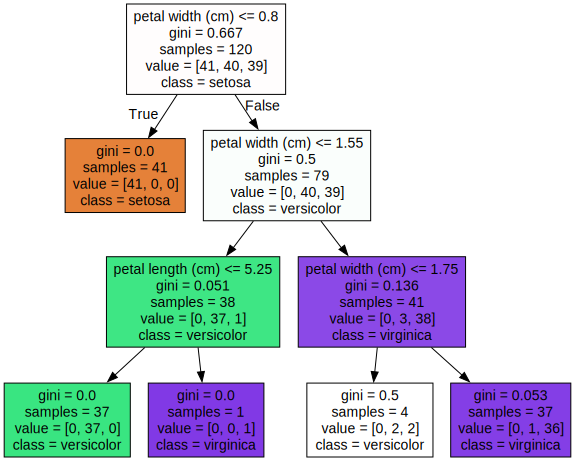

In [14]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dt_clf, 
                out_file='tree_max_depth_3.dot', 
                class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, 
                filled=True,
               )

with open('tree_max_depth_3.dot') as file:
    graph = file.read()
    
graphviz.Source(graph)

In [16]:
dt_clf.get_depth()

3

In [18]:
dt_clf.get_n_leaves()

5

## 하이퍼파라미터 조정 : min_samples_leaf=4

In [19]:
# 1. 결정 트리 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11, min_samples_leaf=4)

# 2. 학습
dt_clf.fit(x_train, y_train)

# 3. 예측
pred = dt_clf.predict(x_test)

# 4. 평가
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
f'테스트 데이터 세트 정확도 : {acc: .4f}'

'테스트 데이터 세트 정확도 :  0.9333'

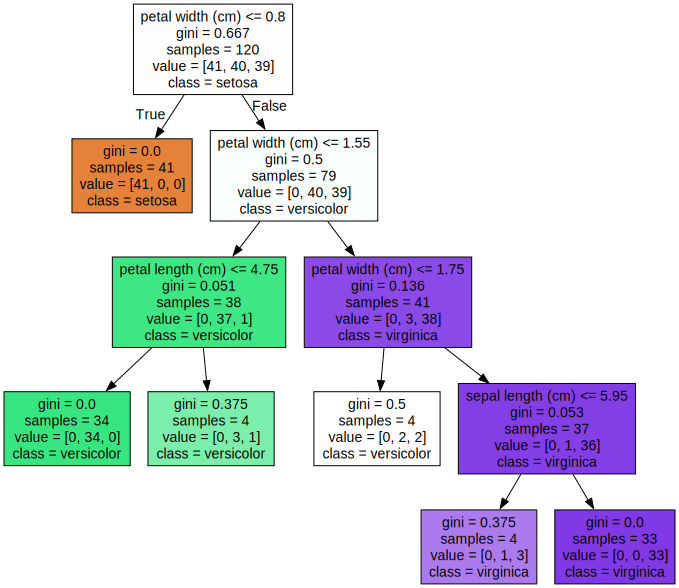

In [20]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dt_clf, 
                out_file='tree_min_samples_leaf_4.dot', 
                class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, 
                filled=True,
               )

with open('tree_min_samples_leaf_4.dot') as file:
    graph = file.read()
    
graphviz.Source(graph)

## 하이퍼파라미터 조정 : min_samples_split=4

In [26]:
# 1. 결정 트리 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11, min_samples_split=4)

# 2. 학습
dt_clf.fit(x_train, y_train)

# 3. 예측
pred = dt_clf.predict(x_test)

# 4. 평가
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
f'테스트 데이터 세트 정확도 : {acc: .4f}'

'테스트 데이터 세트 정확도 :  0.9333'

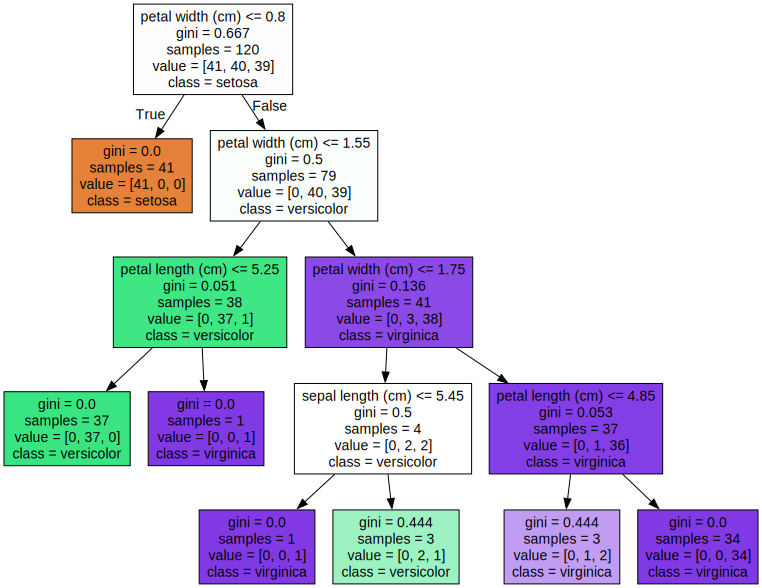

In [27]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dt_clf, 
                out_file='tree_min_samples_leaf_4.dot', 
                class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, 
                filled=True,
               )

with open('tree_min_samples_leaf_4.dot') as file:
    graph = file.read()
    
graphviz.Source(graph)

# feature importance 추출

In [28]:
import seaborn as sns
import numpy as np

In [29]:
dt_clf.feature_importances_

array([0.00862255, 0.        , 0.03311034, 0.95826711])

In [30]:
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print(f'{name} : {value}')

sepal length (cm) : 0.008622547962923045
sepal width (cm) : 0.0
petal length (cm) : 0.03311033887042782
petal width (cm) : 0.9582671131666491


<Axes: >

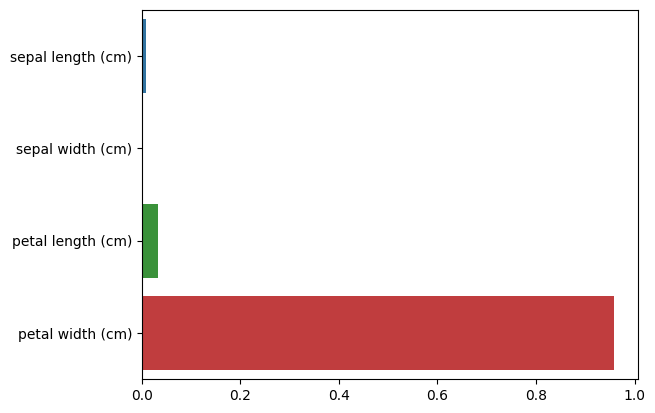

In [31]:
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)